In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

from scipy.stats import norm
from scipy.stats import lognorm

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [3]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("data/led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


C:\Users\dohal\AppData\Local\Temp\ipykernel_15808\2912163957.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
C:\Users\dohal\AppData\Local\Temp\ipykernel_15808\2912163957.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [4]:
#Part 1
dfLE['GDP_per_capita'] = dfLE['GDP'] / dfLE['Population']
print(dfLE[['Country', 'GDP_per_capita']].sample(10, random_state=1))
dfLE['GDP_per_capita'].describe()

                    Country  GDP_per_capita
31   CentralAfricanRepublic      378.777345
66                   Greece    24099.375234
113              Mozambique      306.072088
154                Slovenia     6181.070886
81                   Israel    23542.348201
122                 Nigeria     1456.040068
35                 Colombia     3255.794119
103                    Mali      571.797607
183                 Uruguay     7304.866699
99               Madagascar      334.254756


count      144.000000
mean      6886.716335
std      11457.048602
min        117.466394
25%        735.594643
50%       2424.224604
75%       6083.726099
max      63337.610450
Name: GDP_per_capita, dtype: float64

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

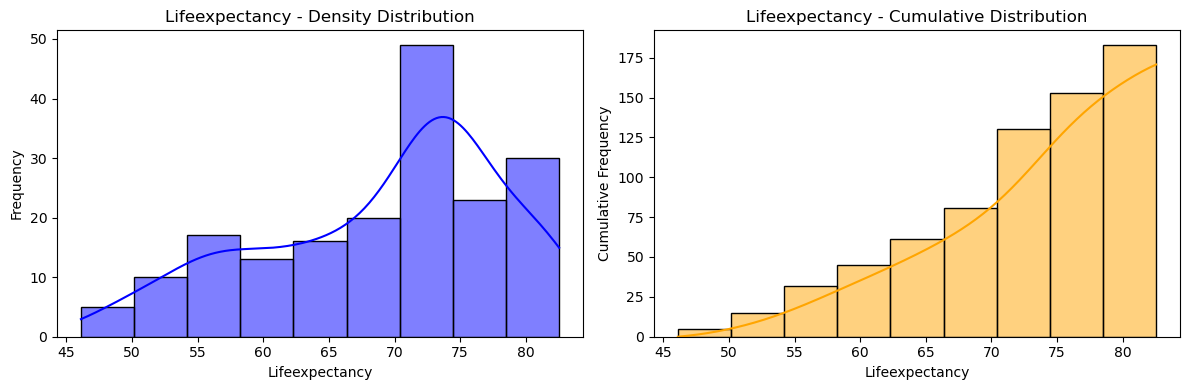

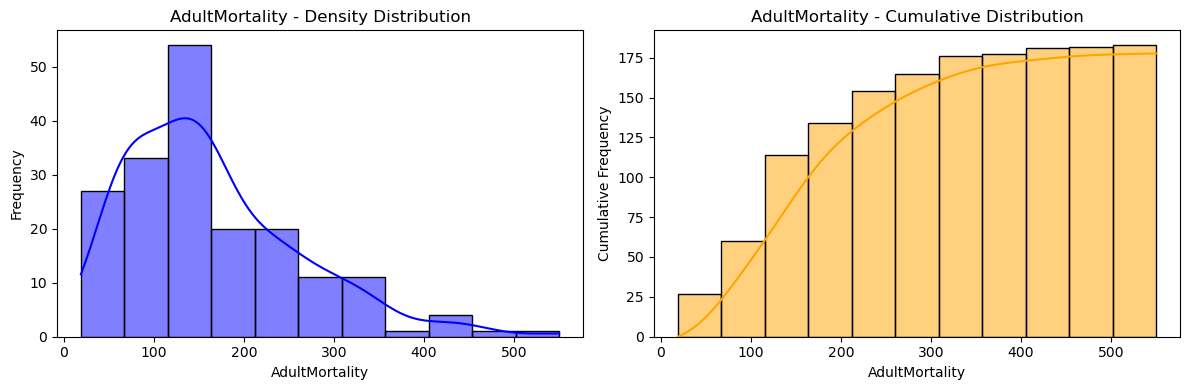

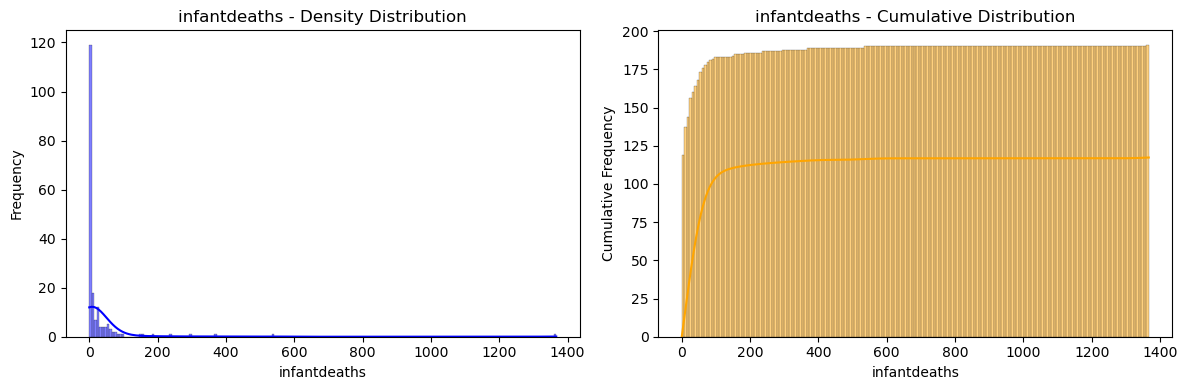

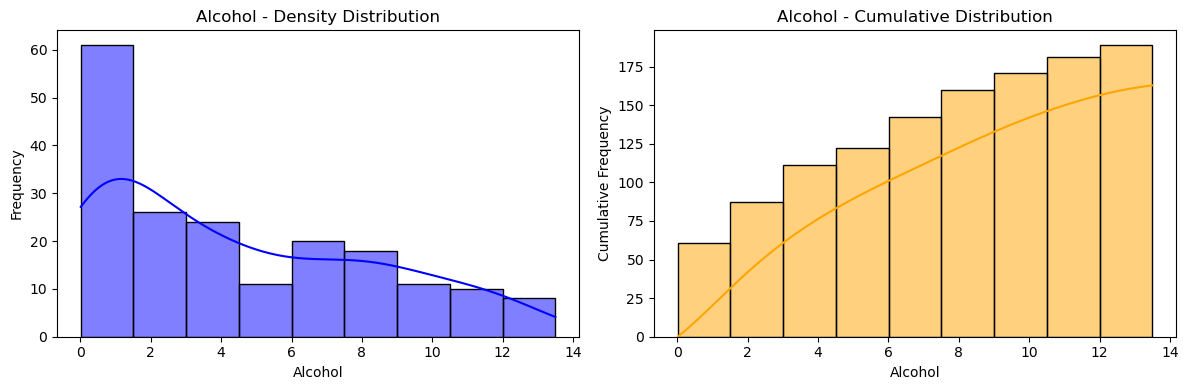

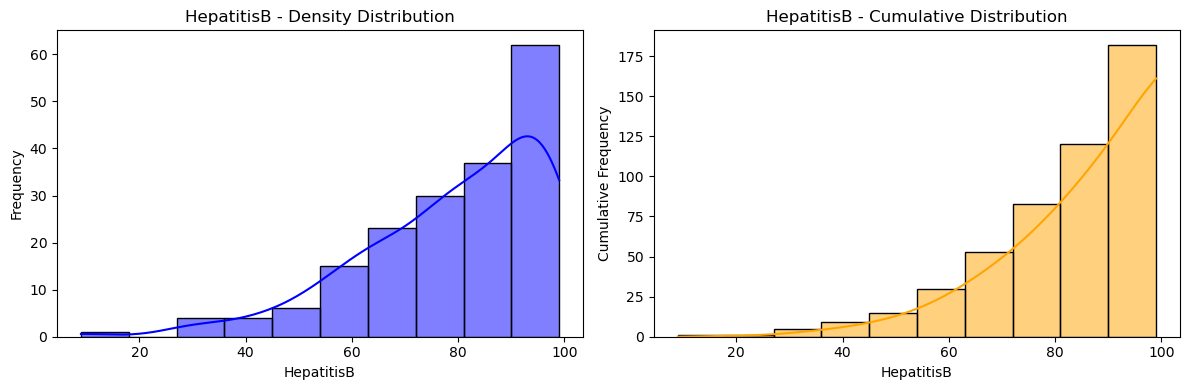

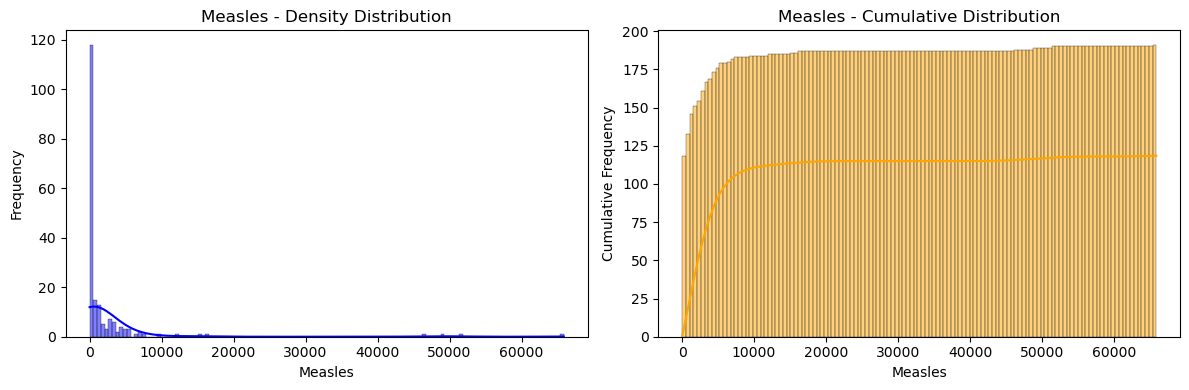

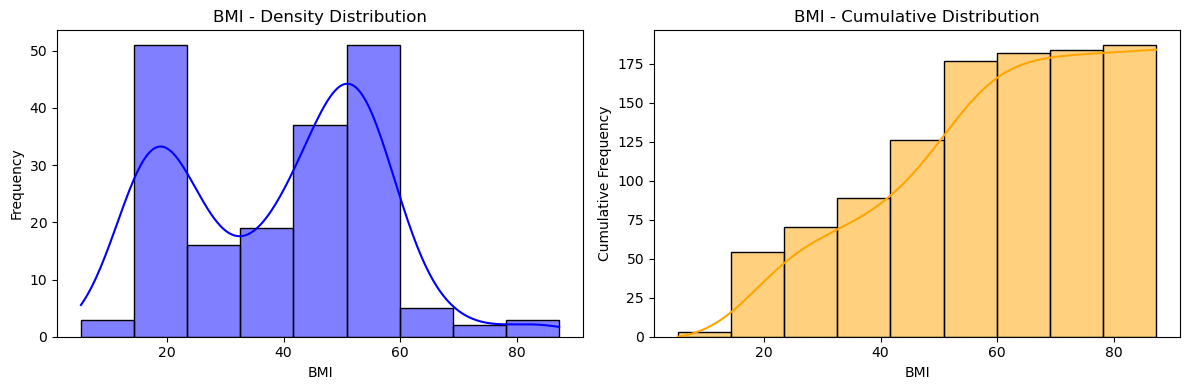

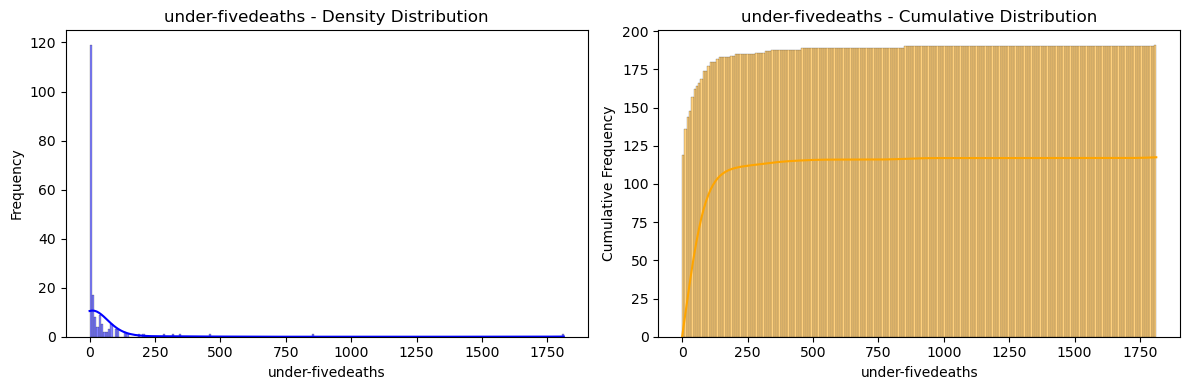

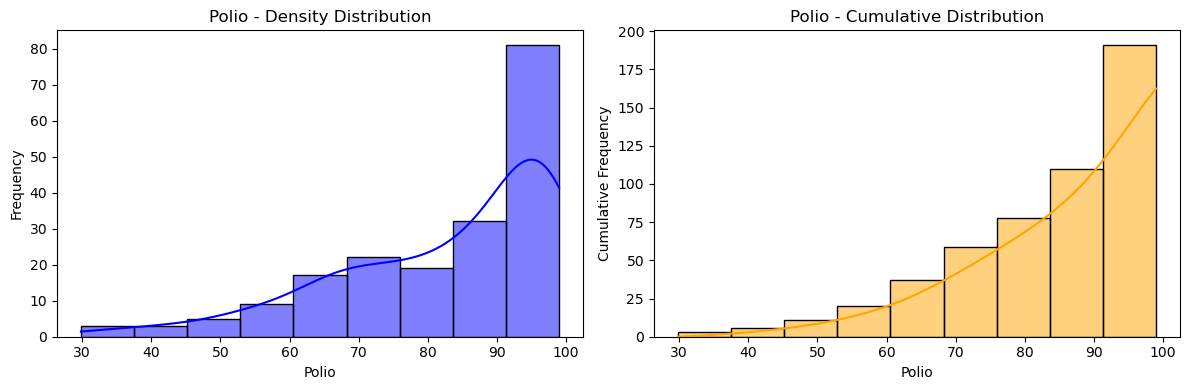

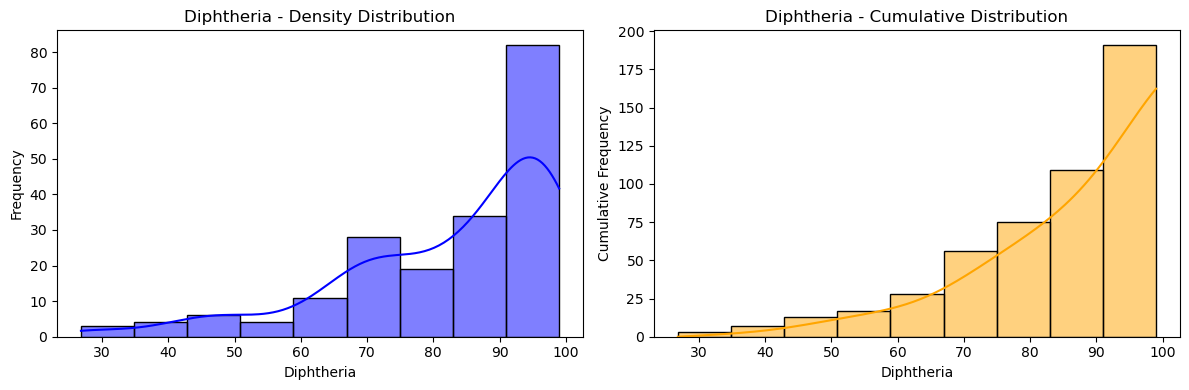

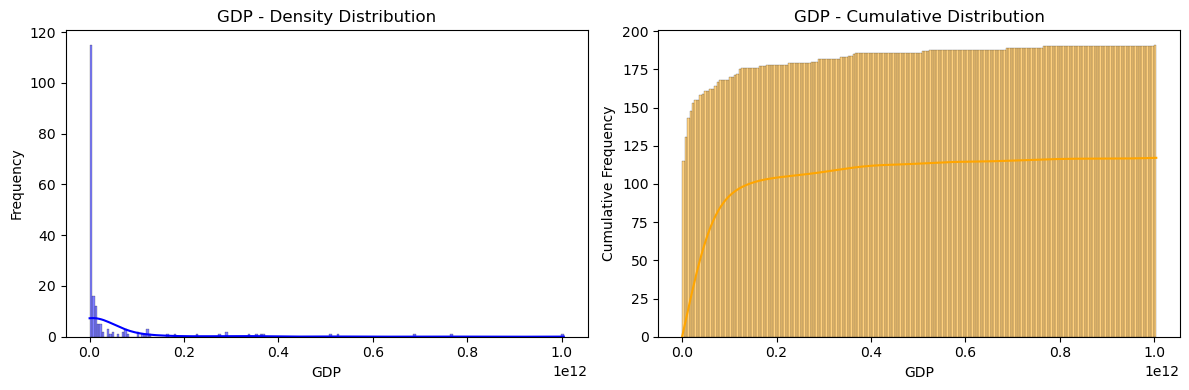

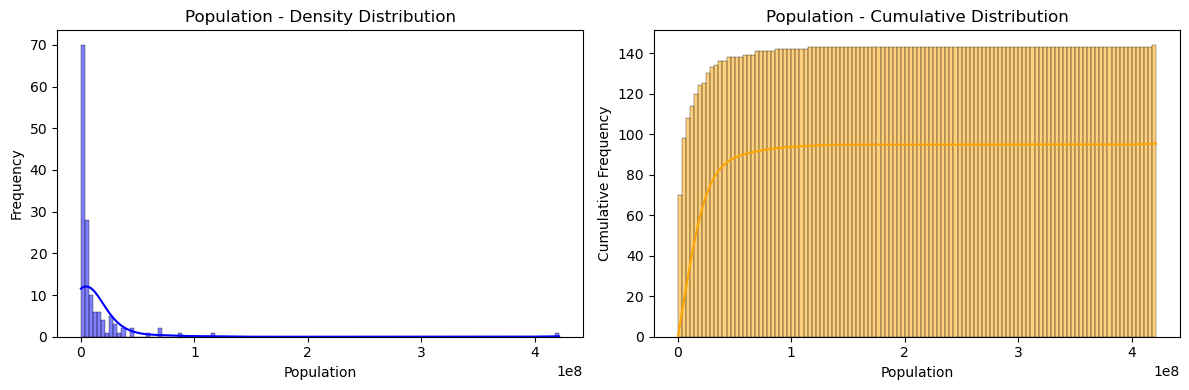

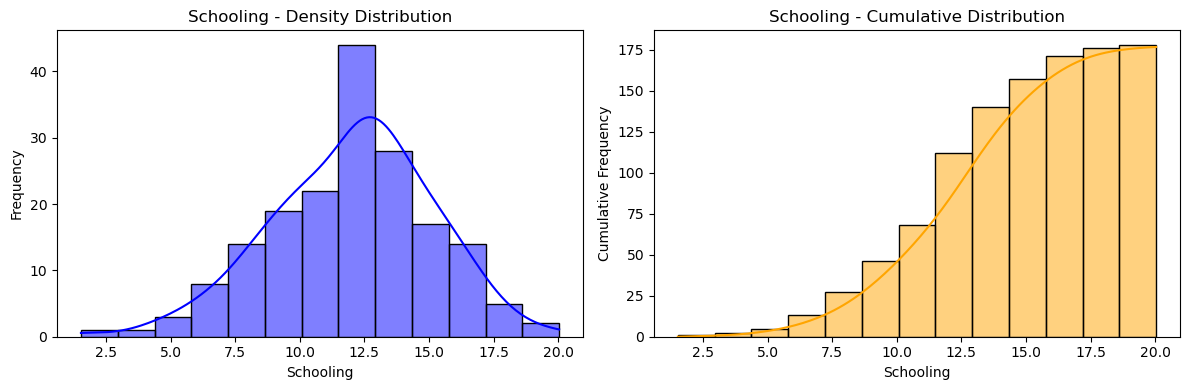

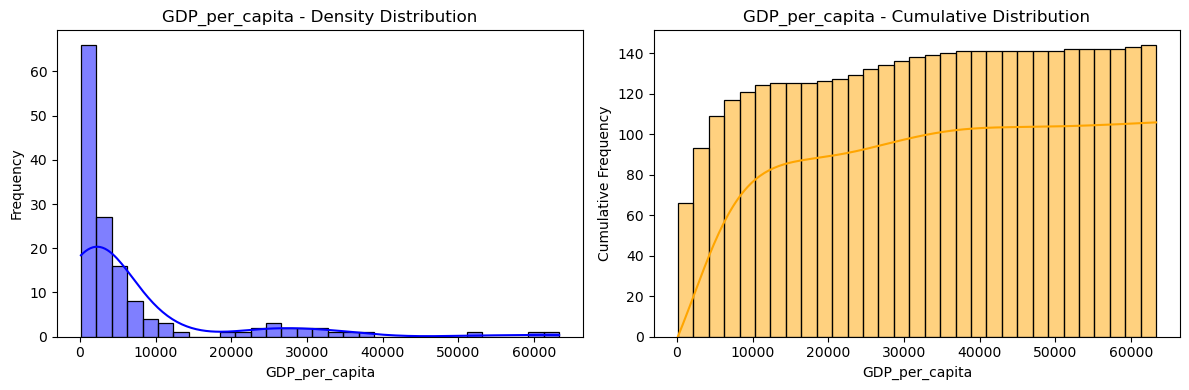

In [5]:
#Print all distributions
numeric_cols = ['Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDP_per_capita']
for col in numeric_cols:
    plt.figure(figsize = (12,4))

    # Regular density plot
    plt.subplot(1, 2, 1)
    sns.histplot(dfLE[col], kde=True, color = 'blue')
    plt.title(f'{col} - Density Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Cumulative distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(dfLE[col], kde=True, cumulative=True, color = 'orange')
    plt.title(f'{col} - Cumulative Distribution')
    plt.xlabel(col)
    plt.ylabel('Cumulative Frequency')

    plt.tight_layout()
    plt.show()






### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

I chose the Normal distribution to model 'schooling', using the empirical mean and standard deviation as parameters. 

Mean = 12.03, Std Dev = 3.10


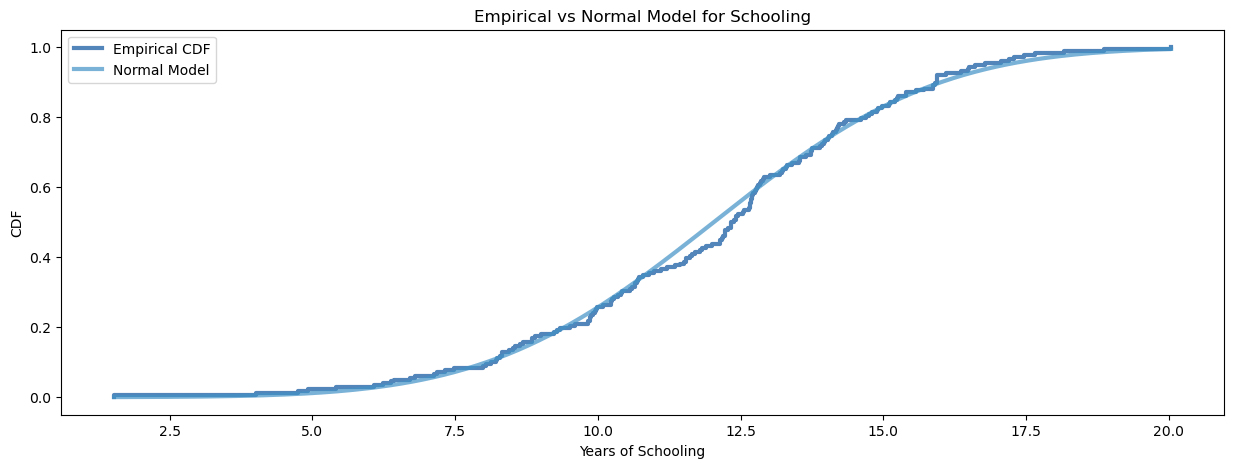

Probability of schooling within 1 year of Canada: 12.03%  


In [6]:
#Analytical for Schooling

#Extracting the column and dropping NaN values
schooling = dfLE['Schooling'].dropna()

# Compute empirical mean and standard deviation
mu = schooling.mean()
sigma = schooling.std()

print(f'Mean = {mu:.2f}, Std Dev = {sigma:.2f}')

# Create the analytical normal distribution
#dist = thinkstats2.NormalPdf(mean, std) 
cdf_emp = thinkstats2.Cdf(schooling, label='Empirical CDF')
xs = np.linspace(schooling.min(), schooling.max(), 200)
ys = norm.cdf(xs, loc=mu, scale=sigma)

# Plot both
thinkplot.PrePlot(2)
thinkplot.Cdf(cdf_emp, label='Empirical CDF')
thinkplot.Plot(xs, ys, label='Normal Model')
thinkplot.Config(xlabel='Years of Schooling', ylabel='CDF', title='Empirical vs Normal Model for Schooling')
plt.show()    

# within 1 year of Canada
canada_schooling = dfLE.loc[dfLE['Country'] == 'Canada', 'Schooling'].values[0]
p_within = norm.cdf(canada_schooling + 1, loc=mu, scale=sigma) - norm.cdf(canada_schooling - 1, loc=mu, scale=sigma)
print(f'Probability of schooling within 1 year of Canada: {p_within*100:.2f}%  ')




The analytical Normal CDF closely follows the empirical CDF, indicating a reasonable fit. Canada's education level is close to the global average.

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

GDP per capita has only positive values and has many low income countries and few very high. Therefore, the lognormal distribution is a much better fit than the normal one. 

Log-scale mean = 7.804, std = 1.471


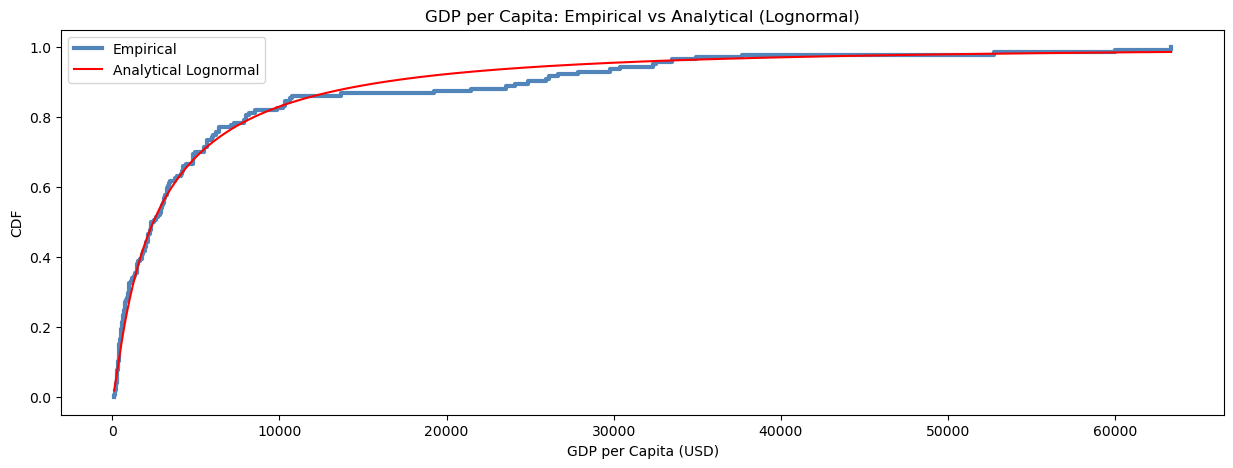

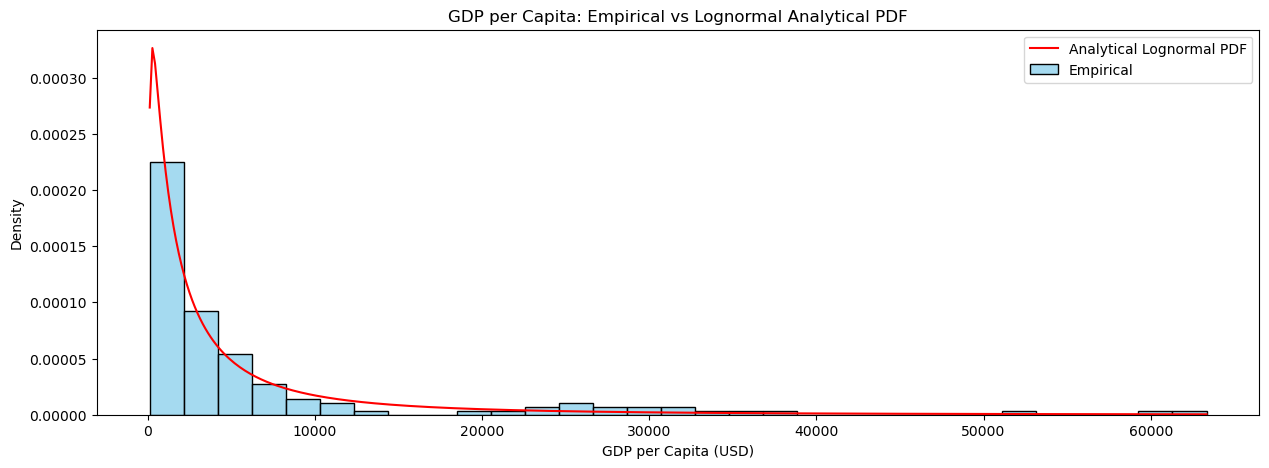

In [7]:
#Analytical for GDP/capita

gdp = dfLE['GDP_per_capita'].dropna()

# Log-transform
log_gdp = np.log(gdp)

# Parameters of the lognormal (mean & std of log values)
mu = log_gdp.mean()
sigma = log_gdp.std()
print(f"Log-scale mean = {mu:.3f}, std = {sigma:.3f}")

# Empirical CDF
cdf_emp = thinkstats2.Cdf(gdp, label='Empirical')

# Analytical CDF (Lognormal)
xs = np.linspace(gdp.min(), gdp.max(), 400)
ys = lognorm.cdf(xs, s=sigma, scale=np.exp(mu))  # scipy lognormal params

# Plot both
thinkplot.PrePlot(2)
thinkplot.Cdf(cdf_emp, label='Empirical')
plt.plot(xs, ys, color='red', label='Analytical Lognormal')
thinkplot.Config(title='GDP per Capita: Empirical vs Analytical (Lognormal)',
                 xlabel='GDP per Capita (USD)', ylabel='CDF')
plt.legend()
plt.show()


sns.histplot(gdp, stat='density', kde=False, color='skyblue', label='Empirical')
xs = np.linspace(gdp.min(), gdp.max(), 400)
ys = lognorm.pdf(xs, s=sigma, scale=np.exp(mu))
plt.plot(xs, ys, color='red', label='Analytical Lognormal PDF')
plt.title('GDP per Capita: Empirical vs Lognormal Analytical PDF')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Density')
plt.legend()
plt.show()








When comparing the analytical and empirical CDFs, the fit is generally good, confirming that the Lognormal model captures the data’s shape.
The model slightly deviates in the upper tail because a few extremely wealthy countries pull the distribution’s end higher.

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [8]:
corr = dfLE.corr(numeric_only=True)
corr

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
isDeveloped,1.000000,0.501132,-0.408464,-0.109351,0.626779,0.154985,-0.103716,0.336522,-0.112520,0.307959,0.296917,0.296629,-0.071706,0.543994,0.670886
Lifeexpectancy,0.501132,1.000000,-0.896441,-0.199914,0.461720,0.429536,-0.201076,0.723824,-0.225785,0.679231,0.672322,0.296865,-0.039915,0.794457,0.594643
AdultMortality,-0.408464,-0.896441,1.000000,0.099440,-0.286503,-0.321612,0.098834,-0.621810,0.119620,-0.531039,-0.511538,-0.220382,-0.009048,-0.606786,-0.472534
infantdeaths,-0.109351,-0.199914,0.099440,1.000000,-0.111167,-0.302733,0.712011,-0.274028,0.996967,-0.244113,-0.243091,0.128014,0.906138,-0.201924,-0.128237
Alcohol,0.626779,0.461720,-0.286503,-0.111167,1.000000,0.125078,-0.076413,0.342013,-0.108262,0.331366,0.314902,0.349318,-0.055793,0.610650,0.588186
HepatitisB,0.154985,0.429536,-0.321612,-0.302733,0.125078,1.000000,-0.272953,0.317755,-0.317254,0.798701,0.800534,-0.077624,-0.213395,0.392010,0.074391
Measles,-0.103716,-0.201076,0.098834,0.712011,-0.076413,-0.272953,1.000000,-0.297046,0.720567,-0.243365,-0.261900,0.064590,0.524503,-0.173206,-0.118701
BMI,0.336522,0.723824,-0.621810,-0.274028,0.342013,0.317755,-0.297046,1.000000,-0.286628,0.496215,0.483352,0.185955,-0.152137,0.666575,0.426142
under-fivedeaths,-0.112520,-0.225785,0.119620,0.996967,-0.108262,-0.317254,0.720567,-0.286628,1.000000,-0.269488,-0.269620,0.120995,0.891101,-0.217946,-0.133007
Polio,0.307959,0.679231,-0.531039,-0.244113,0.331366,0.798701,-0.243365,0.496215,-0.269488,1.000000,0.947421,0.153221,-0.104346,0.629623,0.356964


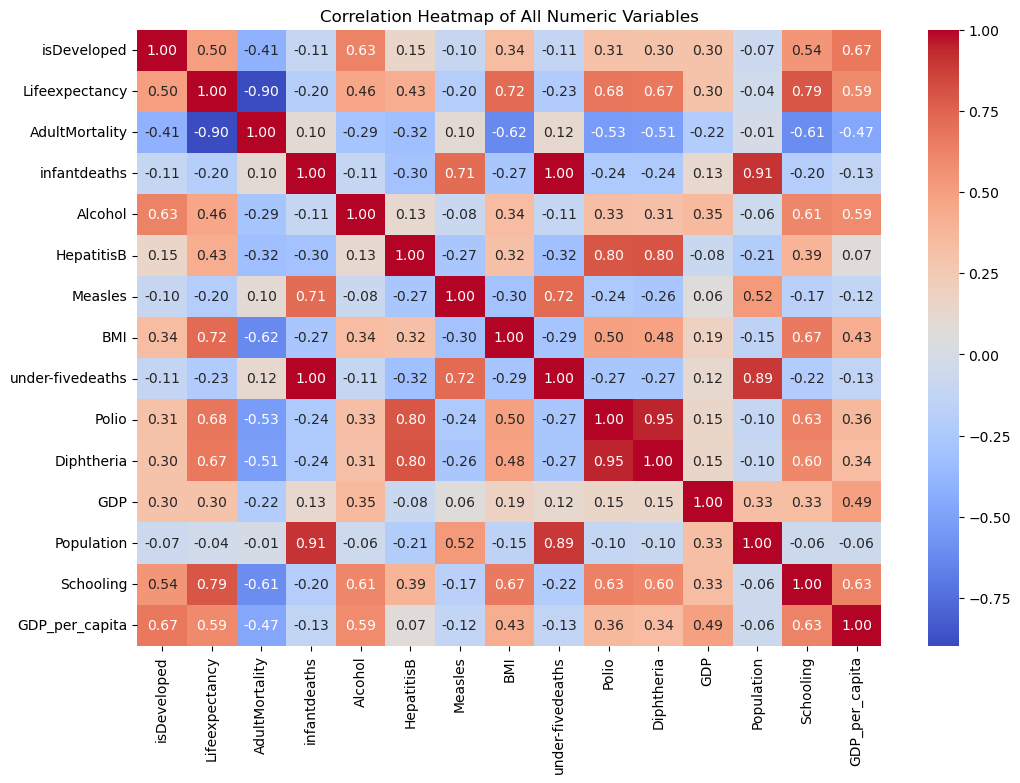

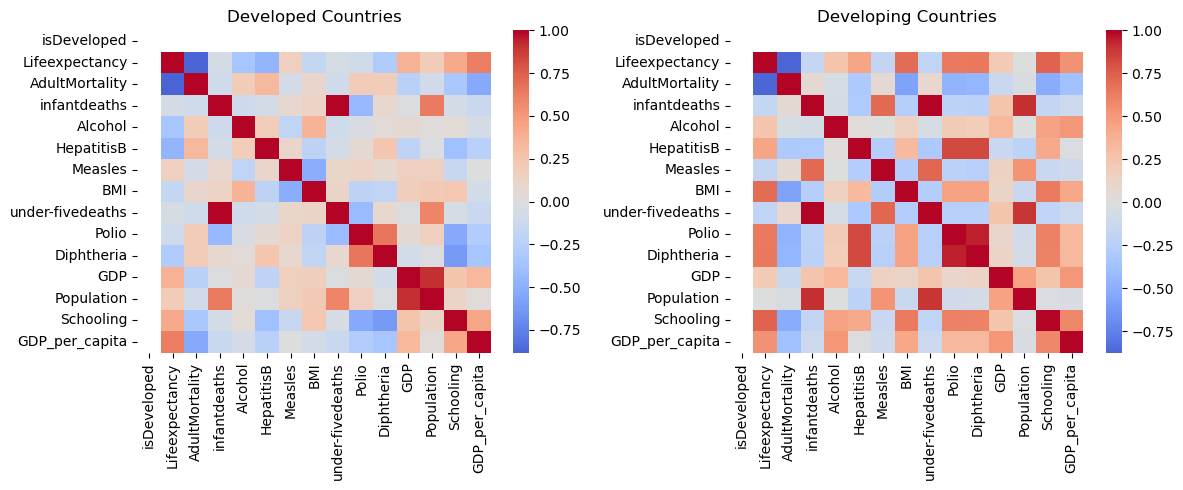

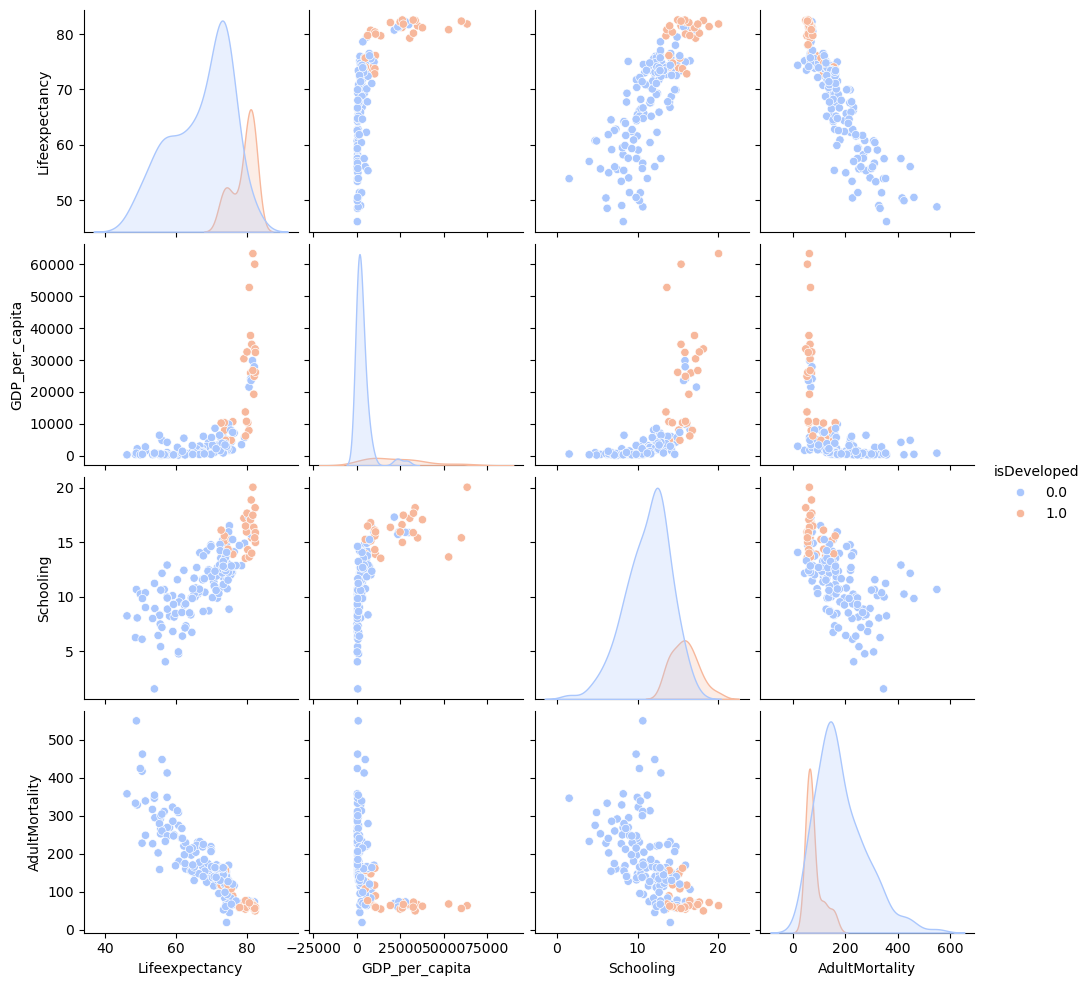

In [9]:
#Visualize correlations. 

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Numeric Variables')
plt.show()

#Separate developed vs developing countries
developed = dfLE[dfLE['isDeveloped'] == 1]
developing = dfLE[dfLE['isDeveloped'] == 0]

# compare correlations for each

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(developed.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title('Developed Countries')

plt.subplot(1, 2, 2)
sns.heatmap(developing.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title('Developing Countries')

plt.tight_layout()
plt.show()


sns.pairplot(dfLE, vars=['Lifeexpectancy', 'GDP_per_capita', 'Schooling', 'AdultMortality'],
             hue='isDeveloped', palette='coolwarm')
plt.show()




<li>Life Expectancy has a strong positive correlation with both GDP per Capita and Schooling, and a strong negative correlation with Adult Mortality and Infant Deaths.
<li>Variables such as Diphtheria, Polio, and Hepatitis B immunization rates are also positively related to Life Expectancy, reflecting the effect of healthcare quality.

<li>For developed countries, the correlations are generally weaker and more uniform — most nations already have high schooling, GDP, and life expectancy, leaving less variation to correlate.
<li>In developing countries, the relationships are much stronger and clearer: as education and income rise, life expectancy improves sharply and mortality declines.

<li>A few outliers appear; small high-income nations or countries with low mortality but modest GDP.

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [11]:
#Calculate correlations and analyze. 

developed = dfLE[dfLE['isDeveloped'] == 1]
developing = dfLE[dfLE['isDeveloped'] == 0]

# Compute correlations with Life Expectancy
corr_dev = developed.corr(numeric_only=True)['Lifeexpectancy'].sort_values(ascending=False)
corr_deving = developing.corr(numeric_only=True)['Lifeexpectancy'].sort_values(ascending=False)

print("Top 3 correlations - Developed:")
print(corr_dev.head(4))  # includes Lifeexpectancy itself
print("\nTop 3 correlations - Developing:")
print(corr_deving.head(4))

Top 3 correlations - Developed:
Lifeexpectancy    1.000000
GDP_per_capita    0.628680
Schooling         0.417589
GDP               0.372168
Name: Lifeexpectancy, dtype: float64

Top 3 correlations - Developing:
Lifeexpectancy    1.000000
Schooling         0.735940
BMI               0.694751
Diphtheria        0.650166
Name: Lifeexpectancy, dtype: float64


<li>For developed countries, Life Expectancy is the strongest correlate with GDP per capita, followed by Schooling and GDP.
For developing countries, Schooling, BMI, and Diphtheria immunization rates have the strongest associations.
This suggests that in wealthier nations, economic prosperity still plays a role, but in developing ones, healthcare and education directly influence longevity.

<li>Higher education often leads to better jobs, income, health awareness, and access to care.
Diphtheria immunization rate directly affects child survival and public health.
Moderate BMI can indicate adequate nutrition, improving resilience and reducing mortality.
However, these are correlations, not strict causations — higher income or education also correlates with other hidden factors like healthcare infrastructure or sanitation.

<li>In developed countries, life expectancy varies less, so correlations are weaker.
In developing countries, differences are larger and more visible, so correlations are stronger. Small improvements in healthcare, nutrition, or education significantly raise life expectancy.

<li>The patterns match real-world findings. Wealth, education, and immunization are among the main global drivers of life expectancy.